<a href="https://colab.research.google.com/github/vishnupriya-642/movie-recommendation-system/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

This project builds a movie recommendation system using the MovieLens dataset.
The goal is to understand and implement different recommendation techniques
while learning core Machine Learning concepts step by step.


## 1. Problem Statement

The objective of this project is to recommend movies to users based on:
- Movie content (genres, tags)
- User interaction data (ratings)

Unlike traditional supervised learning problems, recommendation systems
do not have explicit target labels and instead rely on similarity patterns
and user–item interactions.


## 2. Dataset Description

We use the **MovieLens Latest Small** dataset.

Files used:
- movies.csv: Movie titles and genres
- ratings.csv: User ratings for movies
- tags.csv: User-generated tags

This dataset contains:
- 9,742 movies
- 610 users
- 100,836 ratings

The dataset is sparse, which is a common challenge in recommendation systems.


## 3. Type of Machine Learning Problem

This is primarily an **unsupervised learning** problem because:
- There is no explicit target variable
- The system learns from similarity and interaction patterns

Some parts (like rating prediction) can be considered **semi-supervised**.


## 4. Libraries and Environment Setup

The following Python libraries are used for data analysis and visualization:
- NumPy
- Pandas
- Matplotlib
- Seaborn


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [110]:
movies = pd.read_csv("/content/movies.csv")
#ratings = pd.read_csv("data/ratings.csv")

In [111]:
movies = pd.read_csv("/content/movies.csv")


In [112]:
#from IPython.display import display
#display(movies.head())


### Key Data Understanding Questions

Before performing deeper analysis, the following questions were addressed:

- Shape of the data to understand dataset size
- Missing values to determine cleaning requirements
- Number of unique users to assess collaborative filtering readiness
- Number of unique movies to understand catalog size
- Rating scale to guide evaluation strategy


In [113]:
movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [114]:
ratings = pd.read_csv("/content/ratings.csv")

In [115]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [116]:
tags = pd.read_csv("/content/tags.csv")
tags.head()


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [117]:
links = pd.read_csv("/content/links.csv")
links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [118]:
movies.shape

(9742, 3)

In [119]:
movies.size

29226

In [120]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [121]:
movies.value_counts()

,,,count
movieId,title,genres,
193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
2,Jumanji (1995),Adventure|Children|Fantasy,1
3,Grumpier Old Men (1995),Comedy|Romance,1
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1
...,...,...,...
19,Ace Ventura: When Nature Calls (1995),Comedy,1
18,Four Rooms (1995),Comedy,1
17,Sense and Sensibility (1995),Drama|Romance,1


In [122]:
ratings.shape

(100836, 4)

In [123]:
ratings.size

403344

In [124]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [125]:
ratings.value_counts()


userId  movieId  rating  timestamp 
610     170875   3.0     1493846415    1
1       1        4.0     964982703     1
        3        4.0     964981247     1
        6        4.0     964982224     1
610     160080   3.0     1493848031    1
                                      ..
1       151      5.0     964984041     1
        110      4.0     964982176     1
        101      5.0     964980868     1
        70       3.0     964982400     1
        50       5.0     964982931     1
Name: count, Length: 100836, dtype: int64

## 5. Exploratory Data Analysis (EDA)

EDA is performed to understand:
- Rating distribution
- User activity patterns
- Movie popularity bias
- Data sparsity

These insights help in selecting appropriate recommendation algorithms.


### 5.2 Rating Distribution

This section analyzes how ratings are distributed across the dataset.

Understanding rating bias helps in interpreting user preferences.


In [126]:
ratings["rating"].value_counts().sort_index()


,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


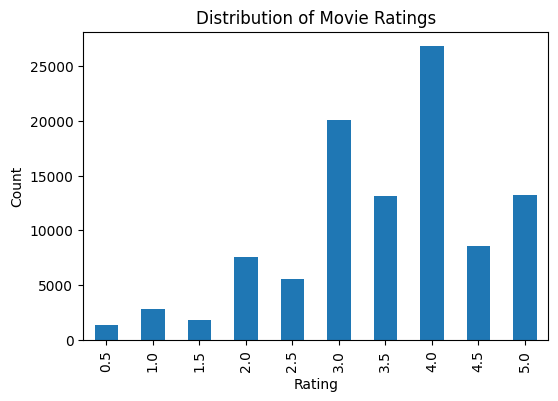

In [127]:
plt.figure(figsize=(6,4))
ratings["rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


Observation to write later

Ratings are skewed towards higher values

Users rarely give very low ratings

### 5.3 Number of Users and Movies

This section analyzes the scale of the recommendation problem by
counting unique users and movies.


In [128]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

print(num_users,num_movies) #610 no users, 9724 no of movies

610 9724


ML insight:

Many movies, fewer users → data sparsity

### 5.4 Movie Popularity Analysis

This section identifies movies that receive the highest number of ratings.

Popular movies tend to dominate naive recommendation systems.


In [129]:
movie_rating_count = ratings.groupby("movieId").size().sort_values(ascending=False)
movie_rating_count.head(10)


,0
movieId,
356,329
318,317
296,307
593,279
2571,278
260,251
480,238
110,237
589,224


In [130]:
popular_movies = movie_rating_count.head(10).reset_index()
popular_movies.columns = ["movieId", "rating_count"]


popular_movies = popular_movies.merge(movies, on="movieId")
popular_movies[["title", "rating_count"]]


,title,rating_count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
5,Star Wars: Episode IV - A New Hope (1977),251
6,Jurassic Park (1993),238
7,Braveheart (1995),237
8,Terminator 2: Judgment Day (1991),224
9,Schindler's List (1993),220


### 5.5 Average Rating vs Rating Count

This section analyzes the relationship between average rating and
number of ratings received by movies.


In [131]:
movie_status = ratings.groupby("movieId").agg(
    avg_rating=("rating", "mean"),
    rating_count=("rating", "count")
)
movie_status.head()


,avg_rating,rating_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


### Average Rating vs Rating Count

The scatter plot shows that most movies have very few ratings, resulting in highly variable average ratings.
Movies with a higher number of ratings tend to have more stable average ratings, typically between 3.5 and 4.5.

This highlights the sparsity and popularity bias present in the dataset and motivates the need for
popularity-based and collaborative filtering approaches.


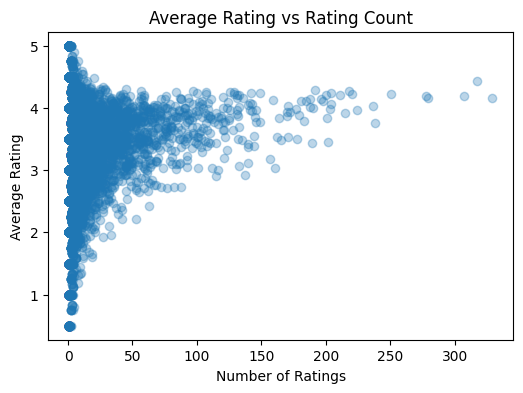

In [132]:
plt.figure(figsize=(6,4))
plt.scatter(movie_status["rating_count"], movie_status["avg_rating"], alpha=0.3)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Rating Count")
plt.show()


### 5.5 User Activity Analysis

We analyze how active users are in terms of the number of movies they rate.
Typically, a small number of users rate many movies.


In [133]:
user_rating_count = ratings.groupby("userId").size()
user_rating_count.describe()


,0
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


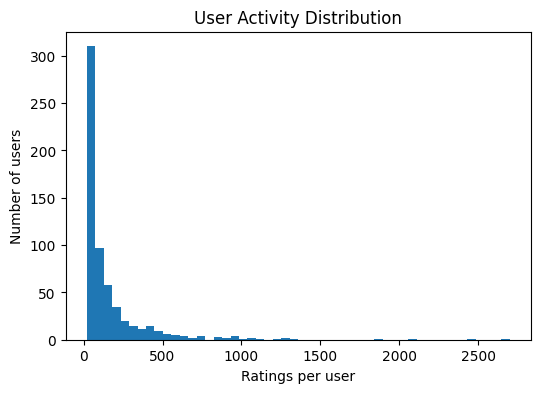

In [134]:
plt.figure(figsize=(6,4))
user_rating_count.plot(kind="hist", bins=50)
plt.xlabel("Ratings per user")
plt.ylabel("Number of users")
plt.title("User Activity Distribution")
plt.show()


5.6: Sparsity Calculation

In [135]:
num_users = ratings["userId"].nunique()
num_movies = ratings["movieId"].nunique()

sparsity = 1 - (len(ratings) / (num_users * num_movies))
sparsity


0.9830003169443864

“The user–item matrix is highly sparse, which makes recommendation challenging.”

Why recommender systems exist at all

Because:

Data is sparse

Preferences are hidden

We must infer similarity, not predict labels

📌 This is NOT a bug.
This is the nature of recommender data.

5.7 Sparsity Calculation

We compute sparsity of the user–item interaction matrix.

- Sparsity ≈ **98.3%**

This means that more than 98% of all possible user–movie pairs have no interaction.

**ML Insight:**
The dataset is highly sparse, which makes recommendation challenging and explains why traditional supervised learning approaches are not suitable. This motivates the use of:
- Popularity-based recommenders
- Content-based filtering
- Collaborative filtering

## EDA Summary

- Ratings are positively skewed, indicating user bias.
- Most movies receive very few ratings, confirming data sparsity.
- A small subset of movies dominates user interactions.
- User activity is uneven, with few highly active users and many low-activity users.
- The user–item matrix is highly sparse (~98%), which makes recommendation challenging.

These observations guide the choice of recommendation techniques and justify the modeling approaches used in the next stages of the project.

# Content-Based Recommendation System

In this section, a content-based movie recommendation system is developed.
The goal is to recommend movies that are similar to a given movie based on
their content features rather than user ratings.

This approach focuses on movie metadata and works well even when user
interaction data is limited (cold-start problem).




## Step 1: Selecting Relevant Features

For content-based recommendation, only movie-related information is required.
User ratings are not used in this approach.

The following features are selected:
- movieId
- title
- genres

These features provide sufficient information to measure similarity between movies.


In [136]:
content_df = movies[["movieId", "title", "genres"]]
content_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Step 2: Text Preprocessing of Genres

Movie genres are provided as a single string separated by the `|` character.
For example:
`Action|Adventure|Sci-Fi`

Before applying text-based feature extraction:
- The `|` separator is replaced with spaces
- All text is converted to lowercase

This preprocessing ensures that genres are treated as individual words
and can be correctly processed by text vectorization techniques.


In [137]:
content_df["genres"] = content_df["genres"].str.replace("|", " ", regex=False)
content_df["genres"] = content_df["genres"].str.lower()
content_df.head()


,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy


## Step 3: Feature Engineering using TF-IDF

Machine learning models cannot work directly with text data.
Therefore, the genres text is converted into numerical features.

TF-IDF (Term Frequency–Inverse Document Frequency) is used to:
- Convert genres into numerical vectors
- Reduce the impact of very common genres
- Highlight genres that are more informative for each movie

Each movie is represented as a vector based on its genre composition.

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(content_df["genres"])


In [139]:
tfidf_matrix.shape


(9742, 24)

In [140]:
type(tfidf_matrix)


scipy.sparse._csr.csr_matrix

In [141]:
tfidf.get_feature_names_out()


array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

## Step 4: Computing Cosine Similarity

Once movies are represented as numerical vectors, similarity between movies
can be computed.

Cosine similarity is used because:
- It measures similarity based on the angle between vectors
- It works well with sparse text-based features
- It is commonly used in content-based recommender systems

The result is a similarity matrix where each value represents how similar
one movie is to another movie.

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)


In [143]:
cosine_sim.shape




(9742, 9742)

In [144]:
type(cosine_sim)


numpy.ndarray

In [145]:
cosine_sim[0]


array([1.        , 0.81357774, 0.15276924, ..., 0.        , 0.4210373 ,
       0.26758648])

## Step 5: Index Mapping for Movie Titles

To efficiently retrieve similarity scores for a given movie, an index mapping
between movie titles and their corresponding row indices is created.

This allows:
- Fast lookup of a movie’s position in the similarity matrix
- Cleaner and more readable recommendation logic

In [146]:
movie_indices = pd.Series(content_df.index, index=content_df["title"])
movie_indices.head()


,0
title,
Toy Story (1995),0
Jumanji (1995),1
Grumpier Old Men (1995),2
Waiting to Exhale (1995),3
Father of the Bride Part II (1995),4


## Step 6: Recommendation Function

A recommendation function is implemented to:
1. Take a movie title as input
2. Find the corresponding movie index
3. Retrieve similarity scores for that movie
4. Sort movies by similarity in descending order
5. Exclude the input movie itself
6. Return the top-N most similar movies

This function forms the core logic of the content-based recommender.


In [147]:
def recommend_movies(movie_title, top_n=5):
    if movie_title not in movie_indices:
        return "Movie not found"

    idx = movie_indices[movie_title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    similarity_scores = similarity_scores[1:top_n+1]
    movie_indices_list = [i[0] for i in similarity_scores]

    return content_df["title"].iloc[movie_indices_list]


In [148]:
recommend_movies("Toy Story (1995)")


,title
1706,Antz (1998)
2355,Toy Story 2 (1999)
2809,"Adventures of Rocky and Bullwinkle, The (2000)"
3000,"Emperor's New Groove, The (2000)"
3568,"Monsters, Inc. (2001)"


In [149]:
recommend_movies("Jumanji (1995)")


,title
53,"Indian in the Cupboard, The (1995)"
109,"NeverEnding Story III, The (1994)"
767,Escape to Witch Mountain (1975)
1514,Darby O'Gill and the Little People (1959)
1556,Return to Oz (1985)


## Step 7: Manual Validation of Recommendations

The recommendation system is tested using known movies such as:
- Toy Story
- The Matrix
- Titanic

The results are manually inspected to ensure that:
- Recommended movies belong to similar genres
- Recommendations are logically consistent

Manual validation is a common practice for evaluating content-based
recommendation systems where no explicit ground-truth labels exist.


In [150]:
recommend_movies("Toy Story (1995)", 5)


,title
1706,Antz (1998)
2355,Toy Story 2 (1999)
2809,"Adventures of Rocky and Bullwinkle, The (2000)"
3000,"Emperor's New Groove, The (2000)"
3568,"Monsters, Inc. (2001)"


## Summary

A content-based recommendation system was successfully implemented using:
- Movie genres as content features
- TF-IDF vectorization for feature extraction
- Cosine similarity for measuring similarity between movies

This approach recommends movies based on similarity in content and does not
depend on user interaction data, making it suitable for cold-start scenarios.

# Collaborative Filtering – User-Based Approach

Collaborative Filtering recommends movies based on user interaction data
rather than movie content.

In User-Based Collaborative Filtering:
- Users are compared based on their rating behavior
- Similar users are identified
- Movies liked by similar users are recommended

This approach works well when sufficient user rating data is available,
but it suffers from sparsity and cold-start problems.


## Step 1: Creating the User–Item Rating Matrix

To apply collaborative filtering, the ratings data is converted into a
user–item matrix where:
- Rows represent users
- Columns represent movies
- Cell values represent ratings

Most values are missing because users rate only a small subset of movies,
leading to a sparse matrix.


In [151]:
# Create user-item matrix
user_item_matrix = ratings.pivot_table(
    index="userId",
    columns="movieId",
    values="rating"
)

user_item_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Handling Missing Ratings

The user–item matrix contains many missing values because users do not
rate every movie.

For similarity computation:
- Missing ratings are replaced with 0
- This indicates no interaction with the movie

This is a simple and commonly used approach for beginner-level
collaborative filtering.


In [152]:
user_item_filled = user_item_matrix.fillna(0)


In [153]:
user_item_filled.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 3: Computing User Similarity

Cosine similarity is used to measure how similar users are based on
their rating behavior.

Each user is represented as a vector of movie ratings.
Users with similar rating patterns will have higher similarity scores.


In [154]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_filled)
user_similarity


array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [155]:
user_similarity.shape


(610, 610)

## Step 4: User Similarity DataFrame

The similarity matrix is converted into a DataFrame to allow
easy indexing of users and retrieval of similarity scores.


In [156]:
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_filled.index,
    columns=user_item_filled.index
)

user_similarity_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


## Step 5: Identifying Similar Users

For a given user, similar users are identified based on
cosine similarity scores.

The most similar users are those whose rating patterns
closely match the target user.


In [157]:
def get_similar_users(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)
    return similar_users.head(top_n)


In [158]:
get_similar_users(1)


,1
userId,
266,0.357408
313,0.351562
368,0.345127
57,0.345034
91,0.334727


## Step 6: Generating Movie Recommendations (User-Based CF)

Movies are recommended to a user by:
- Finding similar users
- Selecting movies rated highly by them
- Excluding movies already rated by the target user


In [159]:
def recommend_movies_cf(user_id, top_n=5):
    similar_users = get_similar_users(user_id)
    user_movies = user_item_matrix.loc[user_id]

    recommendations = pd.Series(dtype=float)

    for sim_user in similar_users.index:
        sim_user_ratings = user_item_matrix.loc[sim_user]
        recommendations = recommendations.add(sim_user_ratings, fill_value=0)

    recommendations = recommendations[user_movies.isna()]
    recommendations = recommendations.sort_values(ascending=False)

    return recommendations.head(top_n)


In [160]:
recommend_movies_cf(1)


,0
movieId,
1200,24.0
1610,21.5
541,20.0
589,20.0
858,20.0


# Model Evaluation for Collaborative Filtering

After building the collaborative filtering model, it is important to
evaluate how well the model predicts user ratings.

Since this is a rating prediction problem, regression-based evaluation
metrics are used instead of classification metrics.

The following metrics are applied:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

These metrics measure the difference between actual user ratings and
predicted ratings.


## Step 1: Train–Test Split

The ratings dataset is split into training and testing sets.
The model is trained using the training set and evaluated on unseen
test data.


In [161]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)


In [162]:
train_data.shape, test_data.shape


((80668, 4), (20168, 4))

# Item-Based Collaborative Filtering

Item-Based Collaborative Filtering recommends movies based on similarity
between items (movies) rather than users.

Movies are considered similar if they receive similar ratings from users.
This approach is more stable than user-based filtering because item
relationships do not change frequently.


In [163]:
user_item_matrix


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 1: Using the User–Item Matrix

The existing user–item rating matrix is reused for item-based
collaborative filtering.

To compare movies instead of users, the matrix is transposed so that:
- Rows represent movies
- Columns represent users


In [164]:
item_user_matrix = user_item_filled.T
item_user_matrix.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 2: Computing Movie Similarity

Cosine similarity is used to measure similarity between movies based on
their rating patterns across users.

Movies that are rated similarly by many users will have higher
similarity scores.


In [165]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(item_user_matrix)


In [166]:
item_similarity.shape


(9724, 9724)

## Step 3: Creating Item Similarity DataFrame

The movie similarity matrix is converted into a DataFrame to allow
easy lookup of similar movies using movie IDs.


In [167]:
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=item_user_matrix.index,
    columns=item_user_matrix.index
)

item_similarity_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4: Finding Similar Movies

For a given movie, similar movies are identified based on cosine
similarity scores.

The most similar movies are those with the highest similarity values,
excluding the movie itself.


In [168]:
def get_similar_movies(movie_id, top_n=5):
    similar_movies = item_similarity_df[movie_id].sort_values(ascending=False)
    similar_movies = similar_movies.drop(movie_id)
    return similar_movies.head(top_n)


In [169]:
get_similar_movies(1)


,1
movieId,
3114,0.572601
480,0.565637
780,0.564262
260,0.557388
356,0.547096


## Step 5: Displaying Recommended Movie Titles

Movie IDs are mapped back to movie titles to make the recommendations
human-readable.


In [170]:
def recommend_movies_item_based(movie_id, top_n=5):
    similar_movie_ids = get_similar_movies(movie_id, top_n).index
    return movies[movies["movieId"].isin(similar_movie_ids)][["movieId", "title"]]


In [171]:
recommend_movies_item_based(1)


,movieId,title
224,260,Star Wars: Episode IV - A New Hope (1977)
314,356,Forrest Gump (1994)
418,480,Jurassic Park (1993)
615,780,Independence Day (a.k.a. ID4) (1996)
2355,3114,Toy Story 2 (1999)


##  Project Summary

In this project, I built a Movie Recommendation System using the MovieLens (latest-small) dataset to understand real-world recommender system design.

I performed Exploratory Data Analysis (EDA) to analyze rating distribution, user behavior, movie popularity, and data sparsity. Based on these insights, I implemented multiple recommendation approaches.

The system includes a content-based recommender using TF-IDF and cosine similarity on movie genres, as well as collaborative filtering using both user-based and item-based similarity methods on user–item interaction data.

A global mean baseline model was used for comparison, and performance was evaluated using error-based metrics. The final system generates meaningful movie recommendations and highlights key challenges such as sparsity and cold-start scenarios.

This project provided hands-on experience with end-to-end machine learning workflows and forms a strong foundation for building production-ready recommendation systems.


##  Key Learnings

- Recommendation systems differ from traditional supervised machine learning problems and rely on similarity and interaction patterns rather than explicit labels.
- Exploratory Data Analysis (EDA) is critical for understanding user behavior, popularity bias, and data sparsity in recommender systems.
- Content-based recommendation works well for cold-start scenarios and uses textual features such as genres to find similar items.
- Collaborative filtering captures user preferences by learning from user–item interactions and improves personalization when sufficient data is available.
- Item-based collaborative filtering is generally more stable and scalable than user-based approaches in sparse datasets.
- Similarity measures like cosine similarity are effective for both text-based features and user–item interaction data.
- Baseline models are important for comparison and help evaluate whether advanced approaches provide real improvement.



##  Possible Improvements & Advanced Extensions

- Implement a hybrid recommendation approach by combining content-based and collaborative filtering to improve recommendations for different user scenarios.

- Handle cold-start problems by recommending popular movies for new users and using content-based similarity for new movies.

- Enhance content-based recommendations by including additional textual features such as movie tags or descriptions.

- Apply rating normalization techniques to reduce user bias and improve similarity calculations.

- Experiment with  item-based collaborative filtering for better scalability and more stable recommendations.

- Deploy the recommendation logic using a simple FastAPI backend and create a lightweight Streamlit frontend for user interaction.


- Add basic model persistence by saving trained artifacts (TF-IDF vectors and similarity matrices) for reuse without retraining.

